# Assignment 5: Geographic Data Analysis

### Assignment Description

In this assignment, you will be using a database of geographic data provided for you in the PySal library to create two plots: a choropleth map and a proportional symbol map. 

In addition to these two plots, you will compute the value of Moran's I for this data.

**Hint:** Use “%matplotlib inline” to display the graph on the Jupyter Notebook(To allow the grader to identify the PartID, add the cell magic after the Graded Cell and PartID comments.).

### Directions

The data for this assignment includes the United States' lower 48 states. In addition to the state-by-state data, the dataset contains shape files for each state that you can use to create the choropleth and proportional symbol maps.

Using the data provided, perform the required analyses and create the requested maps.

### Submission Directions for Assignment Deliverables

This assignment will be auto-graded. We recommend that you use Jupyter Notebook in your browser to complete and submit this assignment. In order for your answers to be correctly registered in the system, you must place the code for your answers in the cell indicated for each question. In addition, you should submit the assignment in the cell's display area. The display area should contain only your answer with no extraneous information, or else the answer may not be picked up correctly.

Each cell that is going to be graded has a set of comment lines at the beginning of the cell. These lines are extremely important and must not be modified or removed. (Graded Cell and PartID comments must be in the same line for proper execution of code.)

Please execute each cell in Jupyter Notebook before submitting.

**NOTE:**  For each question, be sure to add your code in the exact cell that has the comment ```"# Graded Cell, PartID:______"```. If you add extra cells or split your code up into multiple cells, ensure you are adding your output print( ) statement and the chart in the cell containing the comment with regard to each question.


**NOTE:**  If you lose the partId that is mentioned in the first line of each cell with regard to each question, use the syntax described below to add it.
* Question 1: # Graded Cell, PartID : CkcsR 
* Question 2: # Graded Cell, PartID : FqNRm
* Question 3: # Graded Cell, PartID : CtQYv

### Question 1:  
Using the PySal Data, create a choropleth path of the United States that depicts the per capita income of each US state in 2009.

You only need to draw plot for the main land states (except Alaska and Hawaii). You need to show clear illustration of latitude and longitude in the plot.

**Note:** The PySal and GeoPandas libraries both contain utility functions that may make this task easier.

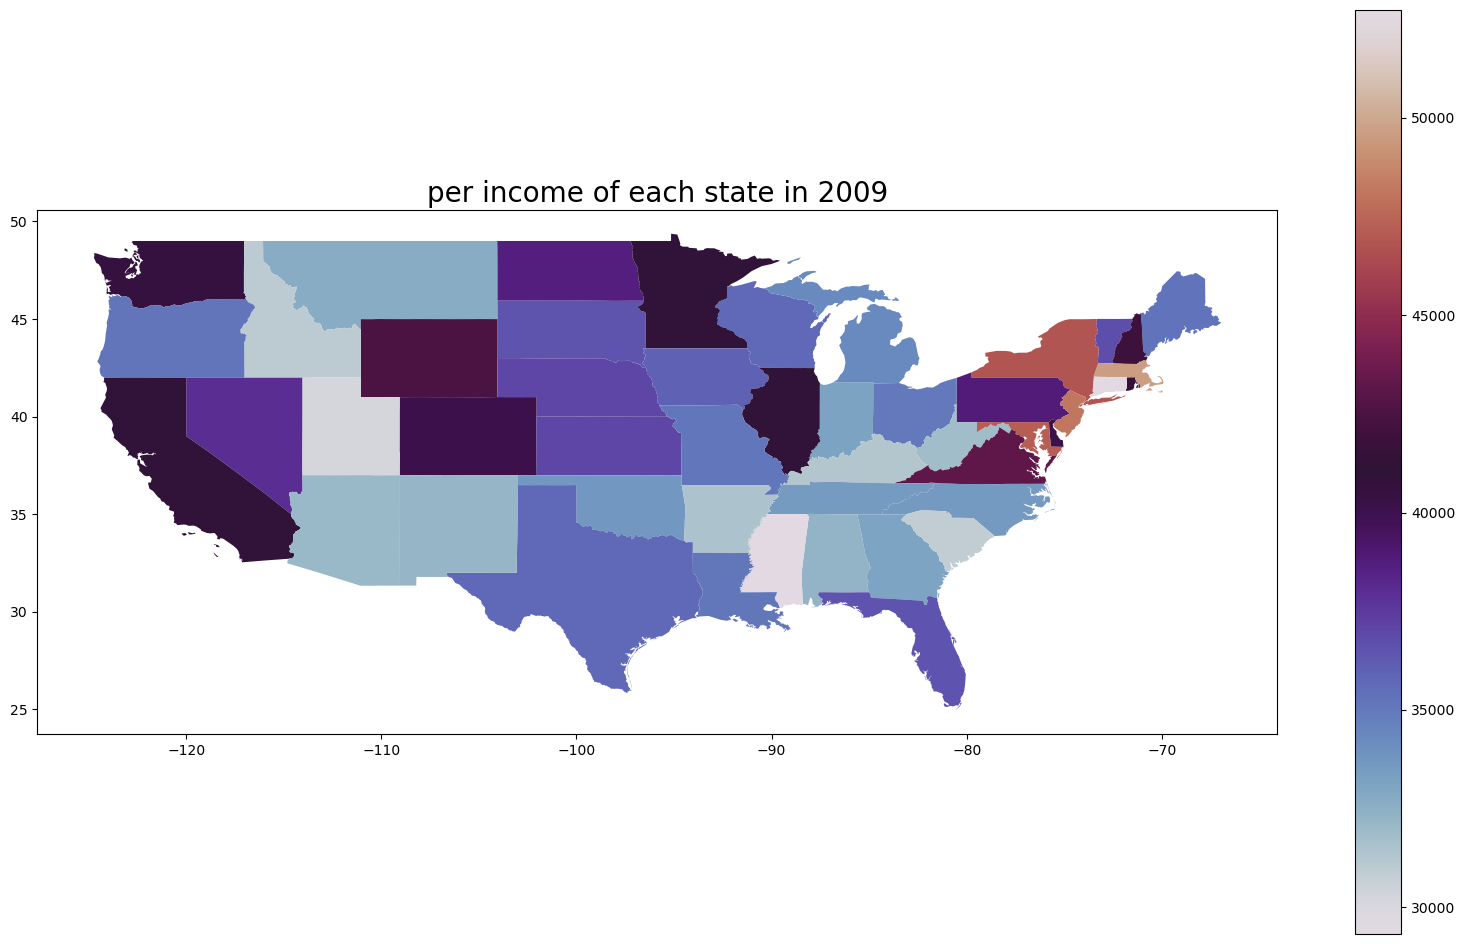

In [4]:
# Graded Cell, PartID: CkcsR

import libpysal as lp 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# your code here
pd.options.mode.chained_assignment = None

geoMap= pd.read_csv(lp.examples.get_path('usjoin.csv'))
shape= gpd.read_file(lp.examples.get_path('us48.shp'))
new=pd.DataFrame()
new=geoMap.loc[:, ["STATE_FIPS", "2009"]]
shape['STATE_FIPS'] = shape['STATE_FIPS'].astype(int)

fig, ax = plt.subplots(1,  figsize=(20, 12))
Maps= shape.merge(new, on="STATE_FIPS")

Maps.plot( column='2009', legend=True, cmap= "twilight", ax=ax)
ax.set_title("per income of each state in 2009", fontsize='20')
plt.show()


### Question 2:
Again using the PySal Data, create a proportional symbol map showing a dot at the centroid of each state that is scaled to the per capita income of each US state in 2009.

You only need to draw plot for the main land states (except Alaska and Hawaii). You need to show clear illustration of latitude and longitude in the plot.

**Notes:** The demonstration notebook for this unit contains code that performs a similar task and may be a useful reference for your assignment.


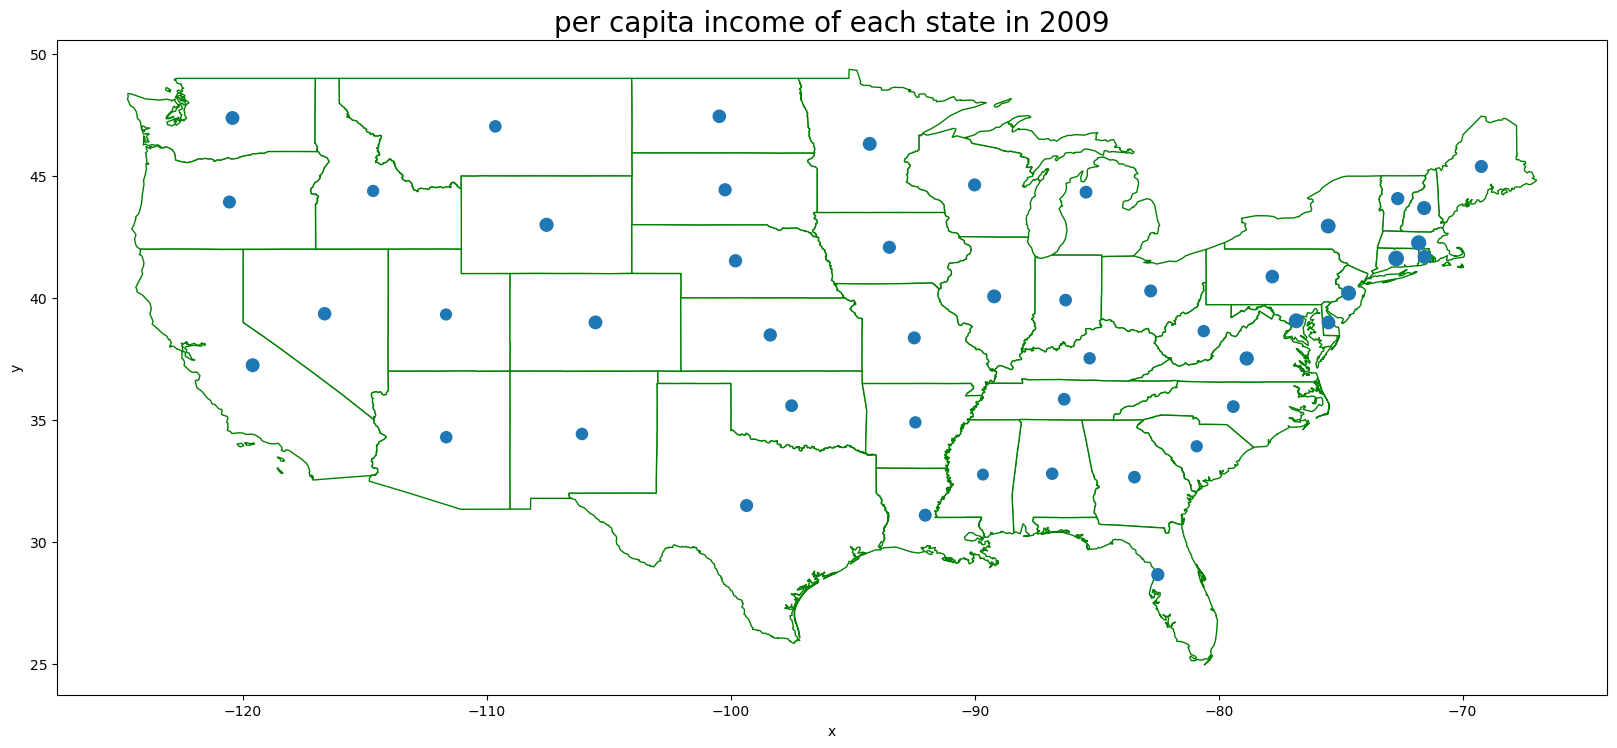

In [11]:
# Graded Cell, PartID: FqNRm
# your code here
import warnings
warnings.filterwarnings('ignore')

geoMap= pd.read_csv(lp.examples.get_path('usjoin.csv'))
shape= gpd.read_file(lp.examples.get_path('us48.shp'))
new=pd.DataFrame()
new=geoMap.loc[:, ["STATE_FIPS", "2009"]]
shape['STATE_FIPS'] = shape['STATE_FIPS'].astype(int)
Maps= shape.merge(geoMap, on="STATE_FIPS")
Maps['centroid_column'] = Maps.centroid

centroids = list(Maps['centroid_column'])
new = pd.DataFrame({'y':[centroids[i].y for i in range(len(centroids))],'x':[centroids[i].x for i in range(len(centroids))],'data':list(Maps['2009'])})

fig, ax = plt.subplots(1,  figsize=(20, 17))
base = Maps.plot(color='white',edgecolor='green', ax=ax)

new.plot(kind='scatter',x='x', y='y',s=new['data']*0.002,ax=base)
ax.set_title("per capita income of each state in 2009", fontsize='20')

plt.show()


### Question 3:
Using the same data, compute the value of Moran's I for the per capita income of each US state in 2009 using Rook Continuity. Report the value of I rounded to 4 decimal places (i.e. x.XXXX)

You only need to print a single value in this question.

**Notes:** Again, the PySal and GeoPandas libraries may contain useful utility functions.

In [10]:
# Graded Cell, PartID: CtQYv
# your code here
import warnings
warnings.filterwarnings('ignore')

us_income = pd.read_csv(lp.examples.get_path('usjoin.csv'))
us_income_shape = gpd.read_file(lp.examples.get_path('us48.shp'))
y = us_income['2009']
w = lp.weights.Rook.from_shapefile(lp.examples.get_path('us48.shp'))

from esda.moran import Moran

mi = Moran(y, w,two_tailed=False) # pass your arguments. Don’t pass “…” literally.
print("{:.4f}".format(mi.I))

0.0407
